<a href="https://colab.research.google.com/github/pccastros/GeospatialDataAndHistogram/blob/main/Geospatial_data_and_histogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Geospatial data and histogram with pandas**

In this project we will work with pandas to get and clean data about New York subway stations, we'll calculate the distance from subway station to my location coordinates, get a histogram of distance range and plot station on a map filtered by ranges.  




First we import necesary libraries

In [1]:
import folium
from folium.features import DivIcon
from IPython.display import display
import pandas as pd
import numpy as np
from math import acos, cos, sin, radians

In [2]:
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt

Import dataset of New York subway stations from https://data.world/

In [3]:
df = pd.read_csv('subway-stations-1.csv', dtype=str)
df.head()

,URL,OBJECTID,NAME,the_geom,LINE,NOTES
0,http://web.mta.info/nyct/service/,1,Astor Pl,POINT (-73.99106999861966 40.73005400028978),4-6-6 Express,"4 nights, 6-all times, 6 Express-weekdays AM s..."
1,http://web.mta.info/nyct/service/,2,Canal St,POINT (-74.00019299927328 40.71880300107709),4-6-6 Express,"4 nights, 6-all times, 6 Express-weekdays AM s..."
2,http://web.mta.info/nyct/service/,3,50th St,POINT (-73.98384899986625 40.76172799961419),1-2,"1-all times, 2-nights"
3,http://web.mta.info/nyct/service/,4,Bergen St,POINT (-73.97499915116808 40.68086213682956),2-3-4,"4-nights, 3-all other times, 2-all times"
4,http://web.mta.info/nyct/service/,5,Pennsylvania Ave,POINT (-73.89488591154061 40.66471445143568),3-4,"4-nights, 3-all other times"


Clean data and separate column 'the_geom' to get latitude and longitude from each subway station

In [4]:
df['the_geom'] = df['the_geom'].map(lambda x: x.lstrip('POINT (').rstrip(')'))
df[['LON','LAT']] = df['the_geom'].str.split(" ", expand=True,)

For this project we only want to show 50 stations and take a sample from our dataset

In [5]:
df = df.sample(n = 50)

We determine a random location in New York trying to simulate my personal location.

In [6]:
lon1 = -74.0165695
lat1 = 40.7068722

Calcule distance between two coordinates

In [7]:
def distance(lon1, lat1, lon2, lat2):
  dist = 6371 * acos(cos(radians(lat1)) * cos(radians(lat2)) * cos(radians(lon2) - radians(lon1)) + sin(radians(lat1)) * sin(radians(lat2)))
  return dist

Get distance between my location and all subway stations in Kilometers, and in other column get integer distance

In [8]:
distances = []
distances_int = []

for row_index, row in df.iterrows():
  distances.append(distance(lon1, lat1, float(row['LON']), float(row['LAT'])))

distances_int = list(map(lambda x: int(x), distances))
df['DIST'] = distances
df['DIST_INT'] = distances_int
df.head()


,URL,OBJECTID,NAME,the_geom,LINE,NOTES,LON,LAT,DIST,DIST_INT
33,http://web.mta.info/nyct/service/,34,77th St,-73.95987399886047 40.77362000074615,4-6-6 Express,"4 nights, 6-all times, 6 Express-weekdays AM s...",-73.95987399886047,40.77362000074615,8.826214,8
134,http://web.mta.info/nyct/service/,135,Crown Hts - Utica Ave,-73.93293256081851 40.66897831107809,3-4,"3-all times exc nights, 4-all times",-73.93293256081851,40.66897831107809,8.214877,8
437,http://web.mta.info/nyct/service/,438,Jackson Hts - Roosevelt Av,-73.89129866519697 40.74653969115889,E-F-M-R,"E,F-all times, M-weekdays and evenings, R-all ...",-73.89129866519697,40.74653969115889,11.440644,11
369,http://web.mta.info/nyct/service/,370,Delancey St - Essex St,-73.98807806807719 40.71868074219453,F,F-all times,-73.98807806807719,40.71868074219453,2.736925,2
414,http://web.mta.info/nyct/service/,415,Canal St,-73.99982638545937 40.71817387697391,J-Z,"J-all times, Z-rush hours AM westbound, PM eas...",-73.99982638545937,40.71817387697391,1.889637,1


Now, we divide al distance values in many ranges, we'll get bins for range of distances

In [9]:
count, bins = np.histogram(df['DIST_INT'])

With bins and count of that bins, now we plot histogram and show counts by range. For example we can see that in range 2.5 - 5 kms we have 8 subway stations. 

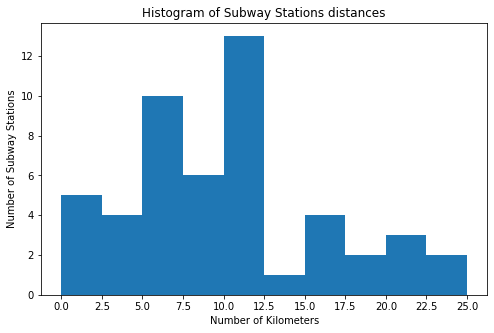

In [10]:
df['DIST_INT'].plot(kind='hist', figsize=(8, 5), xticks=bins)
plt.title('Histogram of Subway Stations distances') 
plt.ylabel('Number of Subway Stations')
plt.xlabel('Number of Kilometers')
plt.show()

Now, we define colors of markers for world map

In [11]:
colors = [
    'blue', 'green', 'pink', 'orange', 'gray', 'purple', 'beige', 'black'
    , 'darkgreen', 'darkblue', 'darkpurple',  'cadetblue', 'lightgray', 
]

Create world map object and locate it in New York region

In [12]:
world_map = folium.Map(location=[40.7590403,-74.0392711], zoom_start=11, min_zoom=1,max_zoom=20)

Plot my location with red marker in the map

In [13]:
folium.Marker((lat1, lon1), icon=folium.Icon(color='red')).add_to(world_map)

Poblate the map, create groups based on distance ranges

In [14]:
for i, b in enumerate(bins):
  
  if i == len(bins) - 1:
    continue
  
  color = colors[i]
  group = folium.FeatureGroup(name="{:.2f} - {:.2f} KMs".format(bins[i], bins[i+1]))  
  df1 = df.loc[(df['DIST_INT'] >= bins[i])  & (df['DIST_INT'] < bins[i + 1])]

  for row_index, row in df1.iterrows():
    pop = f"{row['NAME']}"
    folium.Marker((float(row['LAT']), float(row['LON'])), icon=folium.Icon(color=color), popup=pop).add_to(group)

  group.add_to(world_map)


Create layers in map for distance ranges

In [15]:
folium.LayerControl().add_to(world_map)

Show the map

In [16]:
display (world_map)